In [1]:
import sympy as sp

In [13]:
phi11, phi12, lmbda = sp.symbols('phi11 phi12 lmbda')

eqs = [
    sp.Eq(phi11*(8 - 2*lmbda) + 4*phi12, 0),
    sp.Eq(phi12*(2 - 2*lmbda) + 4*phi11, 0),
    sp.Eq(phi11**2 + phi12**2, 1) # same as initial constraint
]
sol = sp.solve(eqs, (phi11, phi12, lmbda), dict=True)
print(*sol, sep='\n')


{lmbda: 0, phi11: -sqrt(5)/5, phi12: 2*sqrt(5)/5}
{lmbda: 0, phi11: sqrt(5)/5, phi12: -2*sqrt(5)/5}
{lmbda: 5, phi11: -2*sqrt(5)/5, phi12: -sqrt(5)/5}
{lmbda: 5, phi11: 2*sqrt(5)/5, phi12: sqrt(5)/5}


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [17]:
solutions = [
    {
        "lmbda": float(s[lmbda].evalf()),
        "phi": np.array([float(s[phi11].evalf()), float(s[phi12].evalf())])
    }
    for s in sol
]

print(solutions)

[{'lmbda': 0.0, 'phi': array([-0.4472136 ,  0.89442719])}, {'lmbda': 0.0, 'phi': array([ 0.4472136 , -0.89442719])}, {'lmbda': 5.0, 'phi': array([-0.89442719, -0.4472136 ])}, {'lmbda': 5.0, 'phi': array([0.89442719, 0.4472136 ])}]


<>:10: SyntaxWarning: invalid escape sequence '\l'
<>:10: SyntaxWarning: invalid escape sequence '\l'
/var/folders/tq/w_yq51q901g31lqy10hn7b000000gn/T/ipykernel_60671/2524181734.py:10: SyntaxWarning: invalid escape sequence '\l'
  plt.plot([0, phi[0]], [0, phi[1]], label=f'$\lambda$={lmbda}', color=color, lw=1)


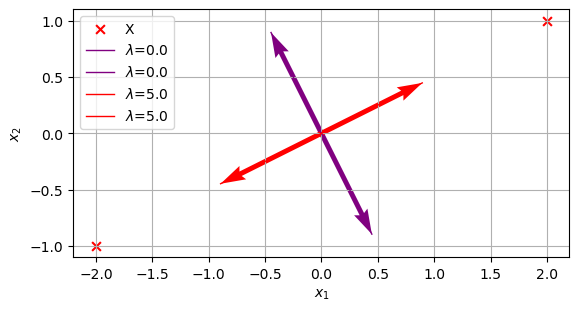

In [45]:
X = np.array([[2, 1],
              [-2, -1]])

plt.scatter(X[:,0], X[:,1], c='red', s=40, label='X', marker='x')

for s in solutions:
    lmbda = s['lmbda']
    phi = s['phi']
    color = "red" if lmbda > 0 else "purple"
    plt.plot([0, phi[0]], [0, phi[1]], label=f'$\lambda$={lmbda}', color=color, lw=1)
    plt.quiver(
        0, 0, # origin
        phi[0],           # dx
        phi[1] ,           # dy
        angles='xy', scale_units='xy', scale=1,
        color=color, width=0.01,
    )


plt.grid(True)
plt.gca().set_aspect('equal')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
plt.legend()
plt.show()
